# DATA PREPROCESSING

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

# Import datasets

In [2]:
schedule_data = pd.read_csv("C:\\Users\\moneesh.basker\\Desktop\\Regression\\Assignment-20221005T031446Z-001\\Assignment\\Schedule Data.csv")
#schedule_data.head()
meta_data = pd.read_csv("C:\\Users\\moneesh.basker\\Desktop\\Regression\\Assignment-20221005T031446Z-001\\Assignment\\ASSET_METADATA.csv")
#meta_data.head()

# Merging Datasets

In [3]:
df = pd.merge(schedule_data, meta_data,how='left',on='ASSET_ID')

In [4]:
df.shape

(2517, 30)

# Missing & Duplicate data

In [5]:
df.isna().sum()

ASSET_ID                     0
AIRING_START_DATE_TIME       0
AIRING_END_DATE_TIME         0
PREMIER_AIRING               0
EXHIBITION_AIRING            0
FREE_AIRING                  0
SCHEDULED_RUNTIME            0
DAY_PART                     0
AIRING_REVENUE               0
C3_RATING                    8
RELEASE_YEAR                 0
MPAA_RATING                 30
GENRE                        0
IMDB_RATING                  0
IMDB_RANKING               577
IMDB_VOTES                   0
Oscar-Nomination             0
Oscar-Wins                   0
Other - Nominations          0
Other - Wins                 0
TOMATO_METER               161
TOMATO_RATING              161
TOMATO_REVIEWS             161
TOMATO_FRESH               161
TOMATO_ROTTEN              161
TOMATO_USER_METER           79
TOMATO_USER_RATINGS         50
TOMATO_USER_REVIEWS         50
TOMATO_IMAGE               161
BOX_OFFICE_EARNINGS       1479
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['AIRING_START_DATE_TIME','AIRING_END_DATE_TIME'],axis=1,inplace=True)

<AxesSubplot:xlabel='C3_RATING'>

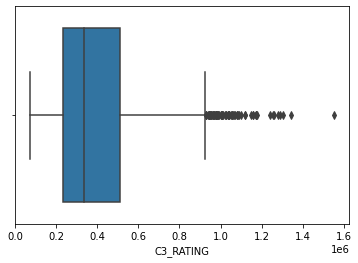

In [8]:
sns.boxplot(x=df['C3_RATING'])

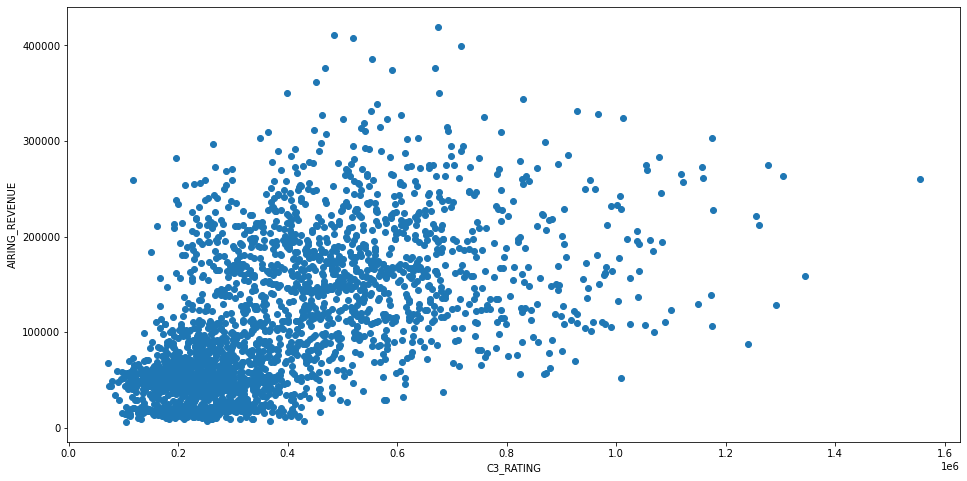

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['C3_RATING'], df['AIRING_REVENUE'])
ax.set_xlabel('C3_RATING')
ax.set_ylabel('AIRING_REVENUE')
plt.show()

C:\Users\moneesh.basker\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


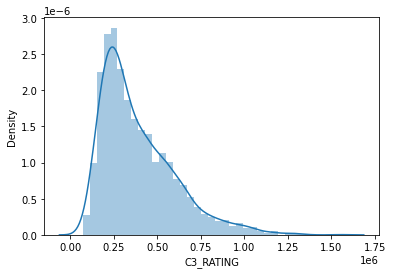

In [10]:
sns.distplot(df['C3_RATING'])
plt.show()

In [11]:
df['C3_RATING'].describe()

count    2.509000e+03
mean     3.905997e+05
std      2.127546e+05
min      7.152900e+04
25%      2.315390e+05
50%      3.329190e+05
75%      5.091160e+05
max      1.553844e+06
Name: C3_RATING, dtype: float64

In [12]:
df.MPAA_RATING.unique()

array(['PG-13', 'R', 'PG', nan, 'APPROVED', 'G', 'NOT RATED', 'UNRATED',
       'X', 'M', 'GP'], dtype=object)

In [13]:
df.MPAA_RATING.value_counts()

R            1131
PG-13         905
PG            343
G              41
APPROVED       30
NOT RATED      15
X              13
UNRATED         5
M               3
GP              1
Name: MPAA_RATING, dtype: int64

In [14]:
df.TOMATO_IMAGE.value_counts()

rotten       1142
certified     725
fresh         489
Name: TOMATO_IMAGE, dtype: int64

<AxesSubplot:>

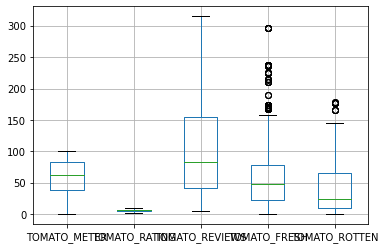

In [15]:
df.boxplot(column=["TOMATO_METER", "TOMATO_RATING","TOMATO_REVIEWS","TOMATO_FRESH","TOMATO_ROTTEN"])

<AxesSubplot:>

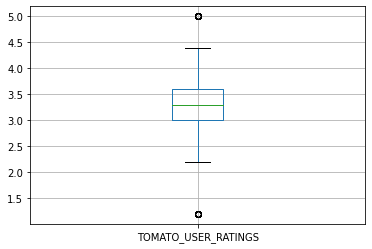

In [16]:
df.boxplot(column=["TOMATO_USER_RATINGS"])

<AxesSubplot:>

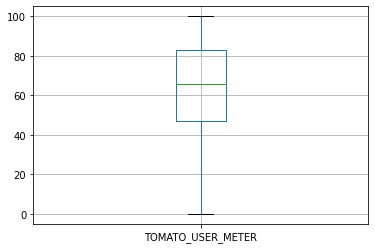

In [17]:
df.boxplot(column=["TOMATO_USER_METER"])

<AxesSubplot:>

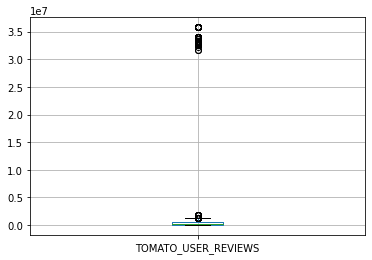

In [18]:
df.boxplot(column=["TOMATO_USER_REVIEWS"])

C:\Users\moneesh.basker\AppData\Local\Temp\ipykernel_1736\295017525.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.loc[df['BOX_OFFICE_EARNINGS'].notna(),'BOX_OFFICE_EARNINGS'] = df.loc[df['BOX_OFFICE_EARNINGS'].notna(),'BOX_OFFICE_EARNINGS'].str.replace(',', '').str.replace('$', '').astype(int)


<AxesSubplot:xlabel='BOX_OFFICE_EARNINGS'>

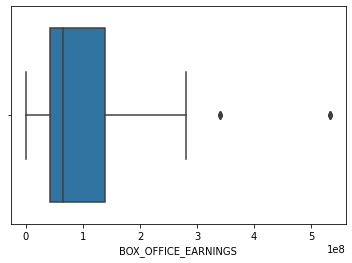

In [19]:
df.loc[df['BOX_OFFICE_EARNINGS'].notna(),'BOX_OFFICE_EARNINGS'] = df.loc[df['BOX_OFFICE_EARNINGS'].notna(),'BOX_OFFICE_EARNINGS'].str.replace(',', '').str.replace('$', '').astype(int)
df["BOX_OFFICE_EARNINGS"] = pd.to_numeric(df["BOX_OFFICE_EARNINGS"])
sns.boxplot(x=df['BOX_OFFICE_EARNINGS'])

<AxesSubplot:xlabel='IMDB_RANKING'>

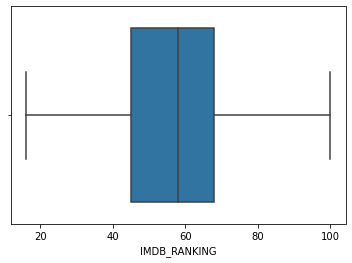

In [20]:
sns.boxplot(x=df['IMDB_RANKING'])

In [21]:
#Handling Missing Data

df['C3_RATING'] = df['C3_RATING'].fillna(df['C3_RATING'].median())
df['MPAA_RATING'] = df['MPAA_RATING'].fillna('NOT RATED')
df['TOMATO_IMAGE'] = df['TOMATO_IMAGE'].fillna(df['TOMATO_IMAGE'].mode()[0])
df['TOMATO_METER'] = df['TOMATO_METER'].fillna(df['TOMATO_METER'].mean())
df['TOMATO_RATING'] = df['TOMATO_RATING'].fillna(df['TOMATO_RATING'].mean())
df['TOMATO_FRESH'] = df['TOMATO_FRESH'].fillna(df['TOMATO_FRESH'].median())
df['TOMATO_ROTTEN'] = df['TOMATO_ROTTEN'].fillna(df['TOMATO_ROTTEN'].median())
df['TOMATO_REVIEWS'] = df['TOMATO_REVIEWS'].fillna(df['TOMATO_REVIEWS'].mean())
df['TOMATO_USER_METER'] = df['TOMATO_USER_METER'].fillna(df['TOMATO_USER_METER'].mean())
df['TOMATO_USER_RATINGS'] = df['TOMATO_USER_RATINGS'].fillna(df['TOMATO_USER_RATINGS'].mean())
df['TOMATO_USER_REVIEWS'] = df['TOMATO_USER_REVIEWS'].fillna(df['TOMATO_USER_REVIEWS'].median())
df['BOX_OFFICE_EARNINGS'] = df['BOX_OFFICE_EARNINGS'].fillna(df['BOX_OFFICE_EARNINGS'].mean())
df['IMDB_RANKING'] = df['IMDB_RANKING'].fillna(df['IMDB_RANKING'].mean())

In [22]:
df.isna().sum()

ASSET_ID               0
PREMIER_AIRING         0
EXHIBITION_AIRING      0
FREE_AIRING            0
SCHEDULED_RUNTIME      0
DAY_PART               0
AIRING_REVENUE         0
C3_RATING              0
RELEASE_YEAR           0
MPAA_RATING            0
GENRE                  0
IMDB_RATING            0
IMDB_RANKING           0
IMDB_VOTES             0
Oscar-Nomination       0
Oscar-Wins             0
Other - Nominations    0
Other - Wins           0
TOMATO_METER           0
TOMATO_RATING          0
TOMATO_REVIEWS         0
TOMATO_FRESH           0
TOMATO_ROTTEN          0
TOMATO_USER_METER      0
TOMATO_USER_RATINGS    0
TOMATO_USER_REVIEWS    0
TOMATO_IMAGE           0
BOX_OFFICE_EARNINGS    0
dtype: int64

# Handling Datatypes

In [23]:
df.dtypes

ASSET_ID                 int64
PREMIER_AIRING           int64
EXHIBITION_AIRING        int64
FREE_AIRING              int64
SCHEDULED_RUNTIME        int64
DAY_PART                object
AIRING_REVENUE           int64
C3_RATING              float64
RELEASE_YEAR           float64
MPAA_RATING             object
GENRE                   object
IMDB_RATING            float64
IMDB_RANKING           float64
IMDB_VOTES              object
Oscar-Nomination         int64
Oscar-Wins               int64
Other - Nominations      int64
Other - Wins             int64
TOMATO_METER           float64
TOMATO_RATING          float64
TOMATO_REVIEWS         float64
TOMATO_FRESH           float64
TOMATO_ROTTEN          float64
TOMATO_USER_METER      float64
TOMATO_USER_RATINGS    float64
TOMATO_USER_REVIEWS    float64
TOMATO_IMAGE            object
BOX_OFFICE_EARNINGS    float64
dtype: object

In [24]:
df["RELEASE_YEAR"]= pd.to_datetime(df.RELEASE_YEAR, format='%Y')
df["IMDB_VOTES"] = df["IMDB_VOTES"].str.replace(',', '')
df["IMDB_VOTES"] = pd.to_numeric(df["IMDB_VOTES"])

# Some plots to understand the data

<AxesSubplot:>

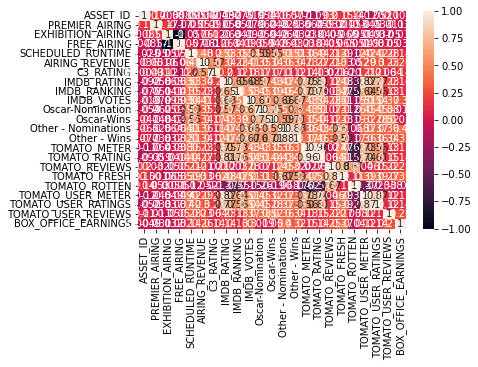

In [25]:
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

<AxesSubplot:xlabel='DAY_PART', ylabel='AIRING_REVENUE'>

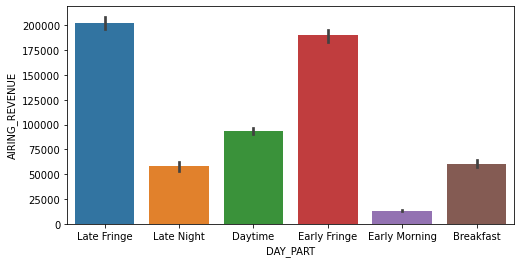

In [26]:
plt.figure(figsize = (8,4))
sns.barplot(x='DAY_PART',y='AIRING_REVENUE',data=df)
#obvious categories that produce more revenue are Late Fringe and Early Fringe the time of streaming does effect revenue

<AxesSubplot:xlabel='SCHEDULED_RUNTIME', ylabel='AIRING_REVENUE'>

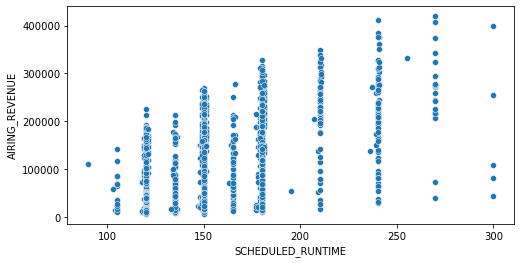

In [27]:
plt.figure(figsize = (8,4))
sns.scatterplot(x='SCHEDULED_RUNTIME',y='AIRING_REVENUE',data=df)

<AxesSubplot:>

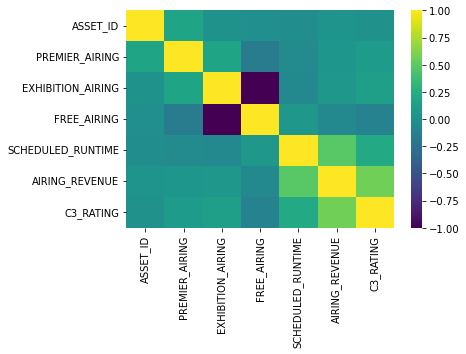

In [28]:
sns.heatmap(schedule_data.corr(),cmap = 'viridis')
#free_airing and exhibition airing exibhits neg correlation

<AxesSubplot:xlabel='C3_RATING', ylabel='AIRING_REVENUE'>

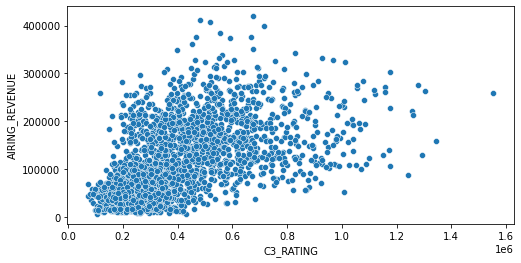

In [29]:
plt.figure(figsize = (8,4))
sns.scatterplot(x='C3_RATING',y='AIRING_REVENUE',data=df)

<AxesSubplot:xlabel='TOMATO_IMAGE', ylabel='AIRING_REVENUE'>

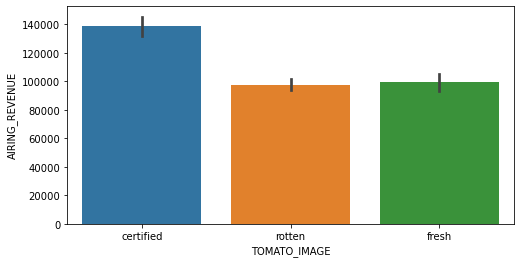

In [30]:
plt.figure(figsize = (8,4))
sns.barplot(x='TOMATO_IMAGE',y='AIRING_REVENUE',data = df)

<AxesSubplot:xlabel='MPAA_RATING', ylabel='AIRING_REVENUE'>

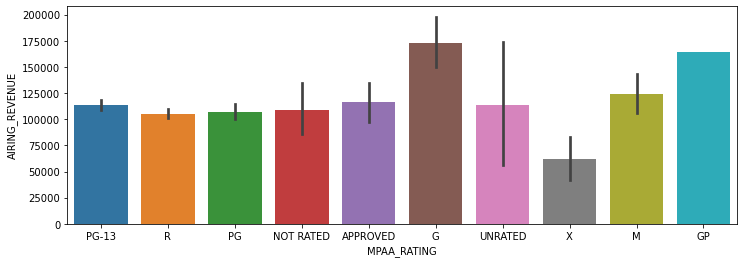

In [31]:
plt.figure(figsize = (12,4))
sns.barplot(x='MPAA_RATING',y='AIRING_REVENUE',data = df)

# Handling Categorical variables

In [32]:
genre = df['GENRE'].to_list()
split_genre = [re.split(', ',item) for item in genre]
ug = list(set(x for item in split_genre for x in item))
ug.sort()
ug

['Action',
 'Adventure',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [33]:
gen_encode = np.zeros((df.shape[0],len(ug)))
for x in range(df.shape[0]):
    for y in range(len(ug)):
        if ug[y] in split_genre[x]:
            gen_encode[x][y]=1
gen_encode = pd.DataFrame(gen_encode,columns = ug)
gen_encode

,Action,Adventure,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2513,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2514,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2515,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df = pd.concat([df,gen_encode], axis=1)
del df['GENRE']

In [35]:
df

,ASSET_ID,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,RELEASE_YEAR,MPAA_RATING,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,174543,0,1,0,150,Late Fringe,197840,595443.0,2000-01-01,PG-13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,181758,0,0,1,180,Late Night,89818,216841.0,1999-01-01,R,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,191074,0,1,0,120,Daytime,60064,388053.0,1990-01-01,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,196156,1,1,0,180,Early Fringe,164494,670869.0,2006-01-01,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,174201,0,0,1,120,Daytime,86961,311122.0,1993-01-01,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,185554,0,1,0,150,Late Night,23021,336985.0,2005-01-01,PG-13,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2513,171859,0,1,0,150,Breakfast,50155,184164.0,1995-01-01,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2514,171986,0,1,0,150,Daytime,86038,461515.0,1984-01-01,PG,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2515,185461,0,0,1,135,Daytime,43436,206781.0,1999-01-01,PG,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
cat_cols = ["ASSET_ID","DAY_PART","RELEASE_YEAR","MPAA_RATING","TOMATO_IMAGE"]
df1 = pd.get_dummies(df, columns=cat_cols,drop_first=True)

In [37]:
df1.head()

,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,AIRING_REVENUE,C3_RATING,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,...,MPAA_RATING_GP,MPAA_RATING_M,MPAA_RATING_NOT RATED,MPAA_RATING_PG,MPAA_RATING_PG-13,MPAA_RATING_R,MPAA_RATING_UNRATED,MPAA_RATING_X,TOMATO_IMAGE_fresh,TOMATO_IMAGE_rotten
0,0,1,0,150,197840,595443.0,7.8,69.000000,205473,2,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,180,89818,216841.0,8.7,73.000000,1080566,4,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,120,60064,388053.0,5.7,57.262887,19896,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,0,180,164494,670869.0,8.0,81.000000,407119,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,120,86961,311122.0,6.4,60.000000,87972,3,...,0,0,0,0,0,1,0,0,1,0


<AxesSubplot:>

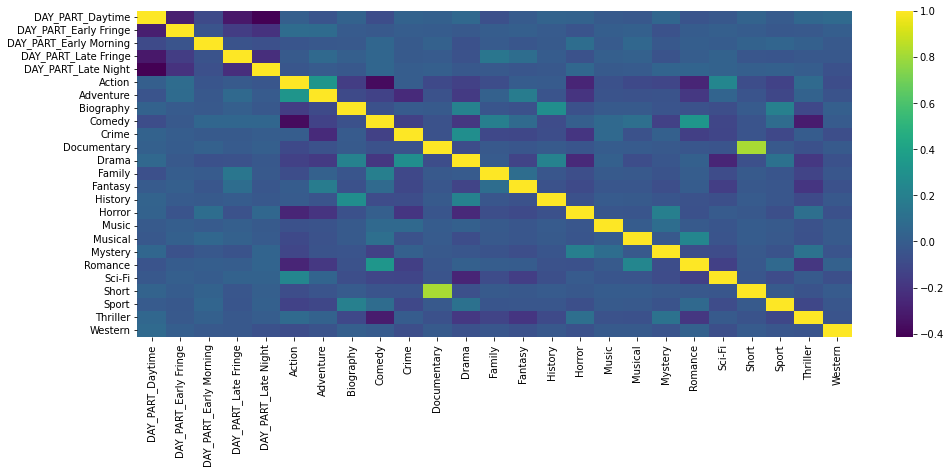

In [38]:
c = df1[[ 'DAY_PART_Daytime', 'DAY_PART_Early Fringe',
       'DAY_PART_Early Morning', 'DAY_PART_Late Fringe', 'DAY_PART_Late Night',
       'Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller',
       'Western']]
plt.figure(figsize=(16,6))
sns.heatmap(c.corr(),cmap='viridis')

In [39]:
df2=df.drop(['ASSET_ID','DAY_PART','RELEASE_YEAR','MPAA_RATING','TOMATO_IMAGE','Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western','AIRING_REVENUE'],axis=1)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PREMIER_AIRING       2517 non-null   int64  
 1   EXHIBITION_AIRING    2517 non-null   int64  
 2   FREE_AIRING          2517 non-null   int64  
 3   SCHEDULED_RUNTIME    2517 non-null   int64  
 4   C3_RATING            2517 non-null   float64
 5   IMDB_RATING          2517 non-null   float64
 6   IMDB_RANKING         2517 non-null   float64
 7   IMDB_VOTES           2517 non-null   int64  
 8   Oscar-Nomination     2517 non-null   int64  
 9   Oscar-Wins           2517 non-null   int64  
 10  Other - Nominations  2517 non-null   int64  
 11  Other - Wins         2517 non-null   int64  
 12  TOMATO_METER         2517 non-null   float64
 13  TOMATO_RATING        2517 non-null   float64
 14  TOMATO_REVIEWS       2517 non-null   float64
 15  TOMATO_FRESH         2517 non-null   f

# Removing Multicollinearity

In [41]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_inf = pd.DataFrame()
vif_inf['VIF'] = [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
vif_inf['Column'] = df2.columns
vif_inf.sort_values('VIF',ascending=False)

,VIF,Column
1,180.327272,EXHIBITION_AIRING
14,108.700317,TOMATO_REVIEWS
2,98.917356,FREE_AIRING
15,66.197853,TOMATO_FRESH
16,37.547772,TOMATO_ROTTEN
13,22.981304,TOMATO_RATING
12,22.736397,TOMATO_METER
17,9.739604,TOMATO_USER_METER
5,7.817860,IMDB_RATING
11,6.818442,Other - Wins


In [42]:
vif_inf = vif_inf[vif_inf['VIF']<=5].Column
v = list(vif_inf)
u = list(['AIRING_REVENUE','ASSET_ID','DAY_PART','RELEASE_YEAR','MPAA_RATING','TOMATO_IMAGE','Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western','AIRING_REVENUE'])
v = v + u
v

['PREMIER_AIRING',
 'SCHEDULED_RUNTIME',
 'C3_RATING',
 'IMDB_RANKING',
 'IMDB_VOTES',
 'Oscar-Nomination',
 'Oscar-Wins',
 'TOMATO_USER_REVIEWS',
 'BOX_OFFICE_EARNINGS',
 'AIRING_REVENUE',
 'ASSET_ID',
 'DAY_PART',
 'RELEASE_YEAR',
 'MPAA_RATING',
 'TOMATO_IMAGE',
 'Action',
 'Adventure',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western',
 'AIRING_REVENUE']

In [43]:
df3 = df[df.columns.intersection(v)]

In [44]:
cat_cols = ["ASSET_ID","DAY_PART","RELEASE_YEAR","MPAA_RATING","TOMATO_IMAGE"]
df3 = pd.get_dummies(df3, columns=cat_cols,drop_first=True)

# Model Creation

In [45]:
x1 = df3.drop("AIRING_REVENUE",axis=1)
y1 = df3["AIRING_REVENUE"]

In [46]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [48]:
x1_train

,PREMIER_AIRING,SCHEDULED_RUNTIME,C3_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,TOMATO_USER_REVIEWS,BOX_OFFICE_EARNINGS,Action,...,MPAA_RATING_GP,MPAA_RATING_M,MPAA_RATING_NOT RATED,MPAA_RATING_PG,MPAA_RATING_PG-13,MPAA_RATING_R,MPAA_RATING_UNRATED,MPAA_RATING_X,TOMATO_IMAGE_fresh,TOMATO_IMAGE_rotten
322,0,120,1051490.0,57.262887,4891,3,0,971.0,9.639287e+07,0.0,...,0,0,0,0,0,0,0,0,0,1
924,0,120,259632.0,57.262887,33398,0,0,60186.0,9.639287e+07,0.0,...,0,0,0,0,0,1,0,0,1,0
715,0,180,928930.0,57.262887,87410,0,0,193962.0,9.639287e+07,1.0,...,0,0,0,0,0,1,0,0,0,0
264,0,135,264340.0,63.000000,53047,0,0,161007.0,1.550000e+07,0.0,...,0,0,0,0,0,1,0,0,1,0
1614,1,150,387210.0,52.000000,97225,0,0,446001.0,9.639287e+07,0.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0,120,251901.0,57.262887,87456,3,0,216522.0,9.639287e+07,0.0,...,0,0,0,0,0,1,0,0,0,0
1731,0,120,202965.0,82.000000,59811,0,0,61524.0,9.639287e+07,0.0,...,0,0,0,0,0,1,0,0,0,0
763,0,150,170815.0,37.000000,37967,0,0,56556.0,3.010000e+07,1.0,...,0,0,0,0,1,0,0,0,0,1
835,0,180,632918.0,79.000000,363529,3,3,939083.0,9.639287e+07,0.0,...,0,0,0,1,0,0,0,0,0,0


# Feature Scaling

In [49]:
x1_train.iloc[:,1:9]=sc.fit_transform(x1_train.iloc[:,1:9])
x1_test.iloc[:,1:9]=sc.fit_transform(x1_test.iloc[:,1:9])

In [50]:
x1_train_sm = sm.add_constant(x1_train)

In [51]:
lr1 = sm.OLS(y1_train,x1_train_sm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:         AIRING_REVENUE   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     17.12
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:41:18   Log-Likelihood:                -23812.
No. Observations:                2013   AIC:                         4.843e+04
Df Residuals:                    1611   BIC:                         5.068e+04
Df Model:                         401                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [52]:
regressor = LinearRegression()
regressor.fit(x1_train,y1_train)
y1_pred = regressor.predict(x1_test)

In [53]:
def performance(x1_train_sm,y1_train, x1_test,y1_test):
    lin_reg = sm.OLS(y1_train,sm.add_constant(x1_train_sm)).fit()
    y_train_pred =  lin_reg.predict(sm.add_constant(x1_train_sm))
    y_test_pred =  lin_reg.predict(sm.add_constant(x1_test))
    print('Train R2',metrics.r2_score(y1_train,y_train_pred))
    print('Test R2',metrics.r2_score(y1_test,y_test_pred))
    print('-'*50)
    print('Train MAPE:', metrics.mean_absolute_percentage_error(y1_train,y_train_pred))
    print('Test MAPE:', metrics.mean_absolute_percentage_error(y1_test,y_test_pred))
    print('Cross Val Score of MAPE:')
    scores = -1*cross_val_score(LinearRegression(),x1_train,y1_train,cv=5,
                scoring='neg_mean_absolute_percentage_error')
    bias  = np.mean(scores)
    variance = np.std(scores,ddof=1)
    print('CV_scores:',scores)
    print('Bias :',bias)
    print('Variance:',variance)

In [54]:
performance(x1_train_sm,y1_train, x1_test,y1_test)

Train R2 0.8099033129671758
Test R2 0.7839655133444481
--------------------------------------------------
Train MAPE: 0.3456892481112837
Test MAPE: 0.41865232835348537
Cross Val Score of MAPE:
CV_scores: [4.95541380e+09 2.77485396e+09 7.38093251e+08 5.22816923e-01
 4.19170308e+10]
Bias : 10077078359.781427
Variance: 17903216548.3935


# Model without removing multicolinearity and feature scaling

In [55]:
X = df1.iloc[:,df1.columns!='AIRING_REVENUE']
Y = df1['AIRING_REVENUE']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [57]:
explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
# mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)

print('explained_variance: ', round(explained_variance,4))    
# print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  -39261.385
r2:  -39512.9302
MAE:  2980582.7937
MSE:  246039226544669.84
RMSE:  15685637.5881


In [58]:
x_train_sm = sm.add_constant(X_train)
x_train_sm

,const,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,C3_RATING,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,...,MPAA_RATING_GP,MPAA_RATING_M,MPAA_RATING_NOT RATED,MPAA_RATING_PG,MPAA_RATING_PG-13,MPAA_RATING_R,MPAA_RATING_UNRATED,MPAA_RATING_X,TOMATO_IMAGE_fresh,TOMATO_IMAGE_rotten
458,1.0,0,1,0,120,302028.0,4.8,19.000000,20858,0,...,0,0,0,0,0,1,0,0,0,1
503,1.0,0,0,1,150,334858.0,6.8,52.000000,174016,0,...,0,0,0,0,1,0,0,0,1,0
820,1.0,0,1,0,180,1055966.0,6.0,44.000000,232895,1,...,0,0,0,0,1,0,0,0,0,1
2056,1.0,0,1,0,150,209500.0,5.7,37.000000,29340,0,...,0,0,0,0,0,1,0,0,0,1
1473,1.0,0,0,1,150,456119.0,6.4,57.262887,18966,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1.0,0,0,1,120,251901.0,7.8,57.262887,87456,3,...,0,0,0,0,0,1,0,0,0,0
1731,1.0,0,1,0,120,202965.0,6.9,82.000000,59811,0,...,0,0,0,0,0,1,0,0,0,0
763,1.0,0,1,0,150,170815.0,5.6,37.000000,37967,0,...,0,0,0,0,1,0,0,0,0,1
835,1.0,0,1,0,180,632918.0,8.1,79.000000,363529,3,...,0,0,0,1,0,0,0,0,0,0


In [59]:
lr = sm.OLS(y_train,x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:         AIRING_REVENUE   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     16.24
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:41:19   Log-Likelihood:                -22318.
No. Observations:                1887   AIC:                         4.543e+04
Df Residuals:                    1491   BIC:                         4.762e+04
Df Model:                         395                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [60]:
def performance(X_train,y_train, X_test,y_test):
    lin_reg = sm.OLS(y_train,sm.add_constant(X_train)).fit()
    y_train_pred =  lin_reg.predict(sm.add_constant(X_train))
    y_test_pred =  lin_reg.predict(sm.add_constant(X_test))
    print('Train R2',metrics.r2_score(y_train,y_train_pred))
    print('Test R2',metrics.r2_score(y_test,y_test_pred))
    print('-'*50)
    print('Train MAPE:', metrics.mean_absolute_percentage_error(y_train,y_train_pred))
    print('Test MAPE:', metrics.mean_absolute_percentage_error(y_test,y_test_pred))
    print('Cross Val Score of MAPE:')
    scores = -1*cross_val_score(LinearRegression(),X_train,y_train,cv=5,
                scoring='neg_mean_absolute_percentage_error')
    bias  = np.mean(scores)
    variance = np.std(scores,ddof=1)
    print('CV_scores:',scores)
    print('Bias :',bias)
    print('Variance:',variance)

In [61]:
performance(X_train,y_train, X_test,y_test)

Train R2 0.8114317320332267
Test R2 0.7822139431718541
--------------------------------------------------
Train MAPE: 0.34185592731583486
Test MAPE: 0.40751128294176514
Cross Val Score of MAPE:
CV_scores: [ 66.10815042  74.46506484   0.5105791  153.93982944 108.01016555]
Bias : 80.60675787204949
Variance: 56.55089301308643
